# Analytical and Symbolical Computations 

This notebook should be run in the Python kernel as parts employs sympy. 

Documentation: 
1. [Expression Tree Manipulation in Sympy](https://brandonwillard.github.io/sympy-expression-tree-manipulation.html) 

## Import Package 

In [77]:
import numpy as np
import sympy as sym
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, pi
from sympy.abc import t
u = Function('u')

To do:
1. replace notion $S_1$ for $A$ and $C_1$ for $B$; 
2. extend computation to third harmonic; 
3. extend computation to approximation by first and third harmonic; 

## Section 1: Analytical Computations

### Useful Formulas 

We will use that 

$A \cos(\omega \, t) + B \sin(\omega \, t) = C \sin(\omega \, t + \phi)$ 

where $C = \pm \sqrt{A^2+B^2}$ and $\phi = -A/B$. 

We will also use that  

$\sin^3(\theta) = \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta)$ and 

$\cos^3(\theta) = \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, \cos^2(\theta) \sin(\theta) + 3 \, A \, B^2 \, \cos(\theta) \sin
^2(\theta) $ 

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [1 - \sin^2(\theta)] \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) \, [1 - \cos^2(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = A^3 \, \cos^3(\theta) + B^3 \, \sin^3(\theta) 
+ 3 \, A^2 \, B \, [\sin(\theta) - \sin^3(\theta)]  + 3 \, A \, B^2 \, [ \cos(\theta) - \cos^3(\theta)] $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = [ A^3 - 3 \, A \, B^2 ] \, \cos^3(\theta) 
+ [ B^3 - 3 \, A^2 \, B ] \, \sin^3(\theta) + 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

$ [ A \, \cos(\theta) + B \, \sin(\theta) ]^3 = 
[ A^3 - 3 \, A \, B^2 ] \, \left[  \frac{3}{4} \, \cos(\theta) + \frac{1}{4} \, \cos(3 \, \theta) \right] 
+ [ B^3 - 3 \, A^2 \, B ] \, \left[ \frac{3}{4} \, \sin(\theta) - \frac{1}{4} \, \sin(3 \, \theta) \right]   
+ 3 \, A^2 \, B \, \sin(\theta)  + 3 \, A \, B^2 \, \cos(\theta) $

Terms in $\cos(\theta)$: 
$ \frac{3}{4} \, [ A^3 - 3 \, A \, B^2 ] \cos(\theta) + 3 \, A \, B^2 \, \cos(\theta) = 
[ \frac{3}{4} \, A^3 + \frac{3}{4} \, A \, B^2 ] \cos(\theta) $

Terms in $\sin(\theta)$:
$ \frac{3}{4} \, [ B^3 - 3 \, A^2 \, B ] \sin(\theta) + 3 \, A^2 \, B \, \sin(\theta) = 
[ \frac{3}{4} \, B^3 + \frac{3}{4} \, A^2 \, B ] \sin(\theta) $

$ [A + B + C]^3 = 
   A^3 + B^3 + C^3 + 3 \, A^2 \, B + 3 \, A^2 \, C + 3 \, A \, B^2 + 3 \, B^2 \, C 
   + 3 \, A \, C^2 + 3 \, B \, C^2 + 6 \, A \, B \, C$ 
   
#### Two Harmonic Components 

Howe does HarmonicBalance.jl manage the computation that follows?  

$ [A_0 + A_1 \, \cos(\theta) + B_1 \, \sin(\theta) + A_3 \, \cos(3 \theta) + B_3 \, \sin(\theta)]^3 = $
(a number of terms goes here)

Terms in constant: 

Terms in $\cos(\theta)$:

Terms in $\sin(\theta)$:

Terms in $\cos(3 \theta)$:

Terms in $\sin(3 \theta)$:

Form matrix of the linear system. What is the sparsity pattern of the matrix? 

### Mass-Spring System  - No External Forcing

Equation to solve 
$$ 
m \, \ddot{u}(t) + k \, u(t) = 0 \, . 
$$

Assume homogeneous solution of the form $u_h(t) = \exp(r \, t)$ with $r$ to be determined. Substituting in the equation yields $ m \, r^2 + k = 0$. Thus $r = \pm \omega_0$ with $\omega_0 = \sqrt{k/m}$. Solution is thus 
$u(t) = C_1 \, \cos(\omega_0 \, t)+ C_2 \, \sin(\omega_0 \, t)$ with $C_1$ and $C_2$ from the initial conditions. 

### Mass-Spring-Damper System - No External Forcing

Equation to solve 
$$ 
m \, \ddot{u}(t) + \gamma \, \dot{u}(t) + k \, u(t) = 0 \, . 
$$

Assume homogeneous solution of the form $u_h(t) = \exp(r \, t)$ with $r$ to be determined. Substituting in the equation yields $ m \, r^2 + \gamma \, r + k = 0$. We assume damping small enough to avoid critical damping. Then $r = -\gamma/(2\,m) \pm \iota \Omega_0$ with 
$\Omega_0 = \sqrt{k/m - (\gamma/(2\,m))^2}$. Solution is thus 
$u(t) = \exp(-\gamma/(2\,m) \, t) \, [ C_1 \, \cos(\Omega_0 \, t)+ C_2 \, \sin(\Omega_0 \, t) ] $ with $C_1$ and $C_2$ from the initial conditions.

### Mass-Spring-Damper System - Sinusoidal Forcing 

Equation to solve 

$$ 
m \, \ddot{u}(t) + \gamma \, \dot{u}(t)+ k \, u(t) = F_0 \sin(\omega_d \, t) \, . 
$$

Assume particular solution of the form $u_p(t) = A \, \cos(\omega_d \, t) + B \, \sin(\omega_d \, t)$. Observe that nothing prevents $A$ and $B$ to attain negative values. We use the method of variation of constants (precursor of the harmonic balance method) to determine the coefficients $A$ and $B$. After substitution, we obtain that $m \, \ddot{u}(t) = - m \, \omega_d^2 \, A \, \cos(\omega_d t) - m \, \omega_d^2 \, B \, \sin(\omega_d t)$ and $\gamma \, \dot{u}(t) = \gamma \, \omega_d \, B \, \cos(\omega_d \, t) - \gamma \omega_d \, A \, \sin(\omega_d \, t) $ and therefore that $m \, \ddot{u}(t) + \gamma \, \dot{u}(t)+ k \, u(t) = (- m \, \omega_d^2 \, A + \gamma \, \omega_d \, B + k \, A) \, \cos(\omega_d \, t) + (- m \, \omega_d^2 \, B - \gamma \, \omega_d \, B + k \, B) \, \sin(\omega_d \, t) $. We obtain the following linear system for the coefficients $A$ and $B$ 

$$
( - m \, \omega_d^2 + k) \, A + \gamma \, \omega_d \, B = 0 \\
- \gamma \, \omega_d \, A + ( - m \, \omega_d^2 + k) \, B = F_0 \, , 
$$

or equivalently  

$$
m \, ( \omega_0^2 - \omega_d^2) \, A + \gamma \, \omega_d \, B = 0 \\
- \gamma \, \omega_d \, A + m \, (\omega_0^2 - \omega_d^2 ) \, B = F_0 \, . 
$$


This linear system has solution $A = D_1 / D$ and $B = D_2 / D$ where 

$$ 
D_1 = \left| \begin{array}{cc} 0 & \gamma \, \omega_d \\ F_0 & - m \, \omega_d^2 + k \end{array} \right| = - \gamma \, \omega_d \, F_0 \\
%
D_2 = \left| \begin{array}{cc} - m \, \omega_d^2 + k & 0 \\ -\gamma \, \omega_d & F_0 \end{array} \right| = ( - m \, \omega_d^2 + k) \, F_0 
= m \, (\omega_0^2 - \omega_d^2) \, F_0 \\ 
% 
D = \left| \begin{array}{cc} - m \, \omega_d^2 + k & \gamma \, \omega_d \\ -\gamma \, \omega_d & - m \, \omega_d^2 + k \end{array} \right| 
= (- m \, \omega_d^2 + k)^2 + \gamma^2 \, \omega_d^2 
= m^2 \, (\omega_0^2 - \omega_d^2)^2 + \gamma^2 \, \omega_d^2 
$$

We have that $D_1^2+D_2^2 = D\,F_0^2$. 
We thus have that $A^2 + B^2 = (D_1^2+D_2^2)/ D^2 = F_0^2/D$. Thus $C = \sqrt{A^2+B^2} = F_0 / \sqrt{D} 
= F_0 / \sqrt{ m^2 \, (\omega_0^2 - \omega_d^2)^2 + \gamma^2 \, \omega_d^2 }$. 

We thus have that 
$$
u(t) = u_p(t) 
= F_0 / \sqrt{ m^2 \, (\omega_0^2 - \omega_d^2)^2 + \gamma^2 \, \omega_d^2 } 
  \sin(\omega_d \, t + \phi) \text{ for } t \rightarrow \infty 
$$

Observe that the resonance occurs at $\omega_0 = \omega_d$ (driving frequency equal to the natural frequency of the system). Observe that the amplitude of $u_p(t)$ is independent of the initial conditions for $u(t)$ and $\dot{u}(t)$.

### Cubic Spring Modem and Harmonic Balance Method: Scalar Case: Single Harmonic  

Equation to solve

$$ 
m \, \ddot{u}(t) + \gamma \, \dot{u}(t)+ k_1 \, u(t) + k_3 \, u^3(t) 
= F_0 \sin(\omega_d \, t) \, . 
$$

We look for a solution of the form 

$$
  u(t) = A \cos(\omega \, t) + B \sin(\omega \, t) \, . 
$$

where $A$ and $B$ are scalar coefficients (amplitudes) to be determined. 

Using the above formulas, one arrives at a third polynomial (thus non-linear) system for $A$ and $B$ given as   

$$
m \, (\omega_0^2 - \omega_d^2) \, A + \gamma \, \omega_d \, B 
+ k_3 \, [ \frac{3}{4} \, A^3 + \frac{3}{4} \, A \, B^2 ] = 0 \\
- \gamma \, \omega_d \, A + m \, (\omega_0^2 - \omega_d^2) \, B 
+ k_3 \, [ \frac{3}{4} \, B^3 + \frac{3}{4} \, A^2 \, B ] = F_0 \, . 
$$

Observe that the systems depends on the paramater $\omega_d$ (driving frequency). It is this 
driving frequency that is varried in many sources on the Duffing Equation. Similar expressions are derived in the documentation of the package [HarmonicBalance](https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/) in the section entitled
<i>Single-Frequency Ansatz</i> on the [page](https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/background/harmonic_balance). 
The non-linear system for $A$ and $B$ is known to have 1 or 3 solutions (by the theorem of Bezout (see wiki) for non-linear algebraic systems that are polynomial in the unknowns). The 2-by-2 Jacobian of this system is obtained by differentiating both equations with respect to $A$ and $B$. It is interesting to investigate how the eigenvalues of this Jacobian changes with the parameters in the model, e.g., the angular frequency $\omega_d$ of the forcing (bifurcation analysis).   

### Cubic Spring Modem and Harmonic Balance Method: Scalar Case: Two Harmonics  

Expand the approximation solution in terms up to $\sin(3 \, \theta)$ and $\cos(3 \, \theta)$

$$
  u(t) = A \cos(\omega \, t) + B \sin(\omega \, t) + 
         C \cos(3 \, \omega \, t) + D \sin(3 \,\omega \, t) \, . 
$$

This time one arrives at a third order polynomial system for $A$, $B$, $C$ and $D$. This system is described in the section entitled <i>Two-Frequency Ansatz</i> on the [page](https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/background/harmonic_balance). The 4-by-4 Jacobian of this system is obtained by differentiating the four equations with respect to $A$, $B$, $C$ and $D$. 

### Cubic Spring Modem and Harmonic Balance Method: Vector Case: Single Harmonic  

Equation to solve

$$ 
  M \, \ddot{{\mathbf u}}(t) + \Gamma \, \dot{{\mathbf u}}(t)+ K_1 \, {\mathbf u}(t) 
  + k_3 \, {\mathbf u}.^3(t) 
  = {\mathbf F}_0 \sin(\omega_d \, t) \, . 
$$

We look for a single-mode harmonic solution of the form 

$$
  {\mathbf u}(t) = {\mathbf A} \cos(\omega \, t) + {\mathbf B} \sin(\omega \, t) \, . 
$$

where ${\mathbf A}$ and ${\mathbf B}$ are vector-valued coefficients (amplitudes) to be determined. 

We arrive at a non-linear system of the form 

$$
(\omega_0^2 - \omega_d^2) \, M \, {\mathbf A} + \omega_d \, \Gamma \, {\mathbf B} 
+ k_3 \, [ \frac{3}{4} \, {\mathbf A}.^3 + \frac{3}{4} \, {\mathbf A} .* {\mathbf B}.^2 ] 
= {\mathbf 0} \\
- \omega_d \, \Gamma \, {\mathbf A} + (\omega_0^2 - \omega_d^2) \, M \, {\mathbf B} 
+ k_3 \, [ \frac{3}{4} \, {\mathbf B}.^3 + \frac{3}{4} \, {\mathbf A}.^2 .* {\mathbf B} ] = {\mathbf F}_0 \, . 
$$


## Section 2: Fourier Series Symbolically 

Thi allows to verify some of the above computations symbolically.

In [2]:
from sympy import fourier_series, pi
from sympy.abc import x
s = fourier_series(abs(cos(x)), (x, 0, 2*pi))
print(s.scale(1).truncate(n=5)) 

4*cos(2*x)/(3*pi) - 4*cos(4*x)/(15*pi) + 4*cos(6*x)/(35*pi) - 4*cos(8*x)/(63*pi) + 2/pi


## Section 3:  Solve First Order ODE Symbolically

Solve scalar first-order ODE symbolically. 

In [3]:
dsolve(Derivative(u(t), t) + u(t)-sin(4*pi*t), u(t))

Eq(u(t), C1*exp(-t) + sin(4*pi*t)/(1 + 16*pi**2) - 4*pi*cos(4*pi*t)/(1 + 16*pi**2))

In [4]:
eq = u(t).diff(t) + u(t) - sin(4*pi*t)
ics={u(0): 1} 
sol = dsolve(eq,u(t),ics={u(0): 1})
sol

Eq(u(t), sin(4*pi*t)/(1 + 16*pi**2) - 4*pi*cos(4*pi*t)/(1 + 16*pi**2) + (1 + 4*pi + 16*pi**2)*exp(-t)/(1 + 16*pi**2))

In [5]:
# sol_lambda = sym.lambdify(t,u)

In [6]:
nsamples = 100 
tvec = np.linspace(0,1,nsamples)
# sol_vec = sol_lambda(tvec)

## Section 4: Solve Second Order ODE (Mass-Spring-Damper) Symbolically  

In [7]:
from sympy.matrices import Matrix

In [8]:
m, ga, k, om0, omd, F0 = symbols("m ga k om0 omd F0", positive=True)

In [9]:
M = Matrix([[m*(om0**2-omd**2),ga*omd], [-ga*omd,m*(om0**2-omd**2)]]); 
F = Matrix(2,1,[F0,0]); F 
M.LUsolve(F)

Matrix([
[F0*m*(om0**2 - omd**2)/(ga*omd*(ga*omd + m**2*(om0**2 - omd**2)**2/(ga*omd)))],
[                             F0/(ga*omd + m**2*(om0**2 - omd**2)**2/(ga*omd))]])

In [10]:
# model without damping 
eq = m*u(t).diff(t,t) + k*u(t)
ics={u(0): 1, u(t).diff(t).subs(t, 0): 0} 
sol = dsolve(eq,simplify=True,complex=True)
sol

Eq(u(t), C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m)))

In [11]:
# model with damping - requires additional assumptions on the amount of damping 
eq = m*u(t).diff(t,t) + ga*u(t).diff(t) + k*u(t)
ics={u(0): 1, u(t).diff(t).subs(t, 0): 0} 
sol = dsolve(eq,simplify=True,complex=True)
sol

Eq(u(t), C1*exp(t*(-ga + sqrt(ga**2 - 4*k*m))/(2*m)) + C2*exp(-t*(ga + sqrt(ga**2 - 4*k*m))/(2*m)))

## Section 5: Solve 1D Helmholtz Equation Symbolically 

### Section 1.5: Undamped Case: Solving the sinus mode amplitude B(x) only   

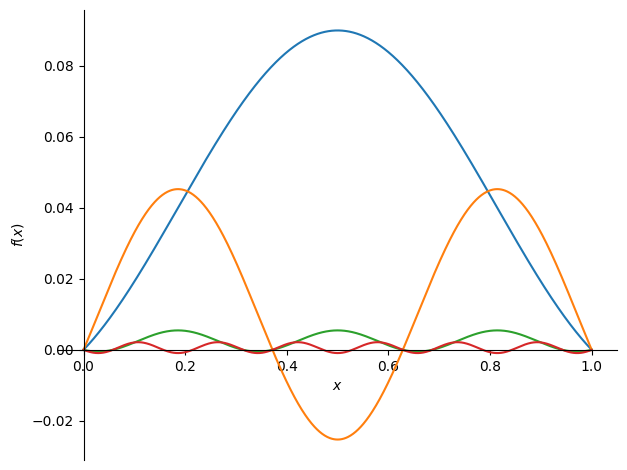

In [78]:
from sympy import Function, dsolve, Derivative, plot
from sympy.abc import x

B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)

# Solve the ODE
eqns = Derivative(B(x), x, x) + k*k*B(x)-1
ics0 = {B(0): 0, B(1): 0}
sol = dsolve(eqns,ics = ics0)

plotb = plot(show=False)
for ki in sym.Array([5.,10.,20.,40.]):
    plotb1 = plot(sol.rhs.subs(k,ki), (x, 0, 1), show=False)
    plotb.append(plotb1[0])
plotb.show()

### Section 2.5: Damped Case: Solving both the cosinus mode amplitude A(x) and sinus mode amplitude B(x)   

The amplitude of the cosinus mode amplitude $A(x)$ increasing with damping as expected. 

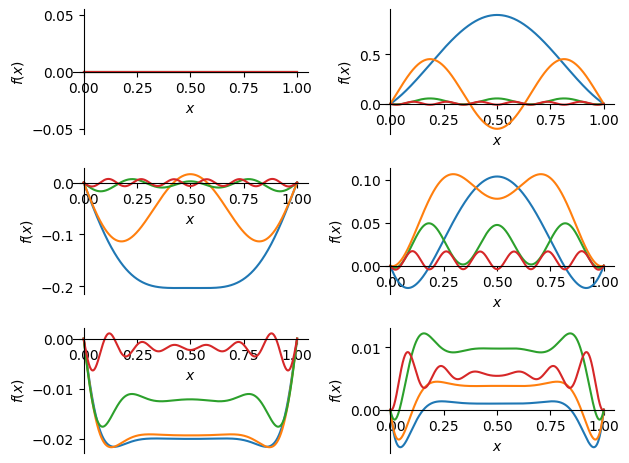

In [93]:
from sympy import Function, dsolve, Derivative, Eq
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

A = symbols("A", cls=Function)
B = symbols("B", cls=Function)
x = symbols("x")
k = symbols("k", positive=True)
ga = symbols("ga", positive=True)

# Solve the ODE
eq1 = Eq(Derivative(A(x), x, x) + k*k*A(x)+ga*B(x),0)
eq2 = Eq(Derivative(B(x), x, x) + k*k*B(x)-ga*A(x),10) 
eqns = (eq1, eq2) 
ics0 = {A(0): 0, A(1): 0, B(0): 0, B(1): 0}

sol = dsolve(eqns,ics = ics0)

plota1 = plot(show=False)
plotb1 = plot(show=False)
plota2 = plot(show=False)
plotb2 = plot(show=False)
plota3 = plot(show=False)
plotb3 = plot(show=False)

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:0}), (x, 0, 1), show=False)
    plota1.append(plota11[0])
    plotb1.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:50}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:50}), (x, 0, 1), show=False)
    plota2.append(plota11[0])
    plotb2.append(plotb11[0])

for ki in sym.Array([5.,10.,20.,40.]):
    plota11 = plot(sol[0].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plotb11 = plot(sol[1].rhs.subs({k:ki, ga:500}), (x, 0, 1), show=False)
    plota3.append(plota11[0])
    plotb3.append(plotb11[0])

PlotGrid(3, 2, plota1, plotb1, plota2, plotb2, plota3, plotb3)

## Sandbox 

To do: fill in the details of the harmonic balance method. Gather terms in cos(x) and sin(x). Parse expreessions to non-linear solver. 

In [12]:
x, A, B = symbols("x A B")

In [13]:
sym.simplify((A*sym.cos(x)+B*sym.sin(x))**3)

(A*cos(x) + B*sin(x))**3

In [14]:
expr1 = sym.expand((A*sym.cos(x)+B*sym.sin(x))**3)
expr1

A**3*cos(x)**3 + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*sin(x)**3

In [16]:
# expr2 = expr1.subs[(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))]
expr2 = expr1.subs([(sym.cos(x)**3,0.75*sym.cos(x)+0.25*sym.cos(3*x)),(sym.sin(x)**3,0.75*sym.sin(x)-0.25*sym.sin(3*x))])
# expr3 = expr2.subs([(sym.cos(x)**2,1-sym.sin(x)**2),(sym.sin(x)**2,1-sym.cos(x)**2)])
expr3 = expr2.subs([(sym.sin(x)*sym.cos(x)**2,sym.sin(x)-sym.sin(x)**3),(sym.cos(x)*sym.sin(x)**2,sym.cos(x)-sym.cos(x)**3)])
expr4 = expr3.subs([(sym.sin(3*x),0),(sym.cos(3*x),0)])
print(expr1)
print(expr2) 
print(expr3)
print(expr4)

A**3*cos(x)**3 + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*sin(x)**3
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*sin(x)*cos(x)**2 + 3*A*B**2*sin(x)**2*cos(x) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
A**3*(0.75*cos(x) + 0.25*cos(3*x)) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + B**3*(0.75*sin(x) - 0.25*sin(3*x))
0.75*A**3*cos(x) + 3*A**2*B*(-sin(x)**3 + sin(x)) + 3*A*B**2*(-cos(x)**3 + cos(x)) + 0.75*B**3*sin(x)
